In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import collections
from matplotlib.colors import ListedColormap



In [2]:
#import the dataset 

df = pd.read_csv('iris.csv')

#data encoding

df['variety'] = df['variety'].map({'Setosa':0,'Versicolor':1,'Virginica':2})

# we create two variables for features and the variety

Y = df['variety']

X = df.drop(columns='variety')

print(X)


print('-----'*20)
print('\n\n')

print(Y)




     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
----------------------------------------------------------------------------------------------------



0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int64


In [3]:
class helper_class():
    
    
   # Initializes the IrisDataset object with features and the variety and split ratio.
       
        
       # Args:
       # X (dataset): the dataset of the features 
       # Y (dataset):  the dataset which consists of  classes 
       # split (float or int): ratio of the dataset to be used for training
       # """
    
    def __init__(self,X,Y,testsize):
        
        
        self.X = X
        self.Y = Y
        self.testsize = testsize

    # split the data set into two sets: a training set and a testing set
    # takes as input the size of training test or the relevant percentage 
    
    def split_data(self):
        
        # if the input is in form of percentage (float)
        
        if isinstance(self.testsize,float) :
            self.testsize =round(self.testsize*len(self.X))
            
       
        
        
        indexes = self.X.index.tolist() # list of indexes
        
        
        train_indices = random.sample(indexes, k = self.testsize) # return randomly the indexes 
        X_train = self.X.loc[train_indices]
        Y_train = self.Y.loc[train_indices]
        X_test  = self.X.drop(train_indices)
        Y_test  = self.Y.drop(train_indices)
        
        return X_train, Y_train, X_test, Y_test 
    
    # accurany method , input actual and predicted values
    
    def accuracy_metric(actual,predicted):
        correct = 0
        for i in range(len(actual)):
            if actual[i] == predicted[i]:
                correct += 1
        return correct / float(len(actual)) * 100.0

In [4]:
class KNN():
    
    # Initializes the training dataset ( features and the variety as None )  
    # and the number of nearest neighbors to select. Also and a helper variable dataframe.

    
    def __init__(self,K_num_neighbors : int  ):
        
        self.X_train = None
        self.Y_train = None
        self.K_num_neighbors = K_num_neighbors
        self.dataframe = None
    
    # fit the model 
    #Args:
    #X_train (Dataframe): Dataset of features
    #Y_train (Dataframe): Dataset of variety 
    
    def fit(self,X_train : pd.core.frame.DataFrame ,Y_train : pd.core.frame.DataFrame ):
        
        
        data = pd.concat([X_train, Y_train], axis=1)
        self.X_train = X_train
        self.Y_train = Y_train
        
        self.dataframe = self.convert_tolist(data)
       
        
    # convert dataframe to list
    #Args:
        # data : Dataframe
        
        # Returns:
        #array: Dataframe.values
        
    def convert_tolist(self,data : pd.core.frame.DataFrame):
        dataset = list()
 
        for row in data.values:
    
            dataset.append(row)
        return dataset
    
    
    
    # Class for calculating the Euclidean distance between two arrays of numbers.
    #Args:
        #array1 (list): first array.
        #array2 (list): second array.
        
        
       # Returns:
       #float: Euclidean distance between the two arrays.
            
        
    def euclidean_distance(self, train, new):

        distance = 0.0
        for i in range(len(new)-1):
            distance += (train[i] - new[i])**2
        return np.sqrt(distance)
    
    #Selects k nearest neighbors of a given test array.
        
       # Args:
       # test_row (array): training instance.
        
       # Returns:
       # list: k nearest neighbors of the test instance .
    
    
    def get_neighbors(self, test_row):
        
        distance = list()
        
        for train_row in self.dataframe:
            dist = self.euclidean_distance(train_row, test_row)
            distance.append((train_row, dist))
            distance.sort(key=lambda x: x[1])
        neighbors = list()
        for i in range(self.K_num_neighbors):
            neighbors.append(distance[i][0])
        return neighbors 
    
    
    #Calculates the class prediction of a test instance.
        # Args:
        # neighbors: list of instances from the training set.
        # Returns:
        # predictions: returns a list which contains the instances and the class are belonged to.
        # informations :returns an array which contains for each predictions   the class are belonged to and 
        # the votes for the nearest neighbor.
        
    
    
    
    def predict(self, X_test):
        
        info = {}
        predictions = []
        information = []
        if  type(X_test)==pd.core.frame.DataFrame:
            X_test = X_test.values
        
        
        for X_test_row in X_test:
            neighbors =  self.get_neighbors(X_test_row)

            classes = list()
            for neighbor in neighbors:
                classes.append(neighbor[-1])
            voting = collections.Counter(classes)
            most_common_class = voting.most_common()[0][0]
            most_common_class_votes = voting.most_common()[0][1]
            info[most_common_class] = most_common_class_votes
            information.append(info)
            predictions.append(np.append(X_test_row, most_common_class))
        return predictions, information
    
    
           
    

In [5]:
split = helper_class(X,Y,130)

X_train, Y_train, X_test, Y_test  =split.split_data()


print('X_train: \n\n',X_train,' \n')
print(20*'-----')
print('Y_train: \n\n',Y_train,' \n')
print(20*'-----')
print('X_test: \n\n',X_test,' \n')
print(20*'-----')
print('Y_test: \n\n',Y_test,' \n')
print(20*'-----')

X_train: 

      sepal.length  sepal.width  petal.length  petal.width
105           7.6          3.0           6.6          2.1
57            4.9          2.4           3.3          1.0
38            4.4          3.0           1.3          0.2
123           6.3          2.7           4.9          1.8
40            5.0          3.5           1.3          0.3
..            ...          ...           ...          ...
75            6.6          3.0           4.4          1.4
103           6.3          2.9           5.6          1.8
35            5.0          3.2           1.2          0.2
130           7.4          2.8           6.1          1.9
59            5.2          2.7           3.9          1.4

[130 rows x 4 columns]  

----------------------------------------------------------------------------------------------------
Y_train: 

 105    2
57     1
38     0
123    2
40     0
      ..
75     1
103    2
35     0
130    2
59     1
Name: variety, Length: 130, dtype: int64  

---------

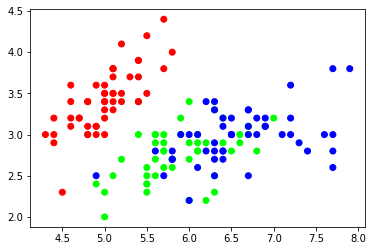

In [6]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


plt.figure()
    
plt.scatter(X['sepal.length'], X['sepal.width'], c=Y.values, cmap=cmap_bold)

plt.show()

In [7]:
k = KNN(3)

In [8]:
data = k.fit(X_train ,Y_train)

In [9]:
# The three  nearest neighbors of the first observation.

neighbors  = k.get_neighbors(X_test.values[0])
neighbors

[array([5.1, 3.5, 1.4, 0.3, 0. ]),
 array([5. , 3.5, 1.3, 0.3, 0. ]),
 array([5. , 3.6, 1.4, 0.2, 0. ])]

In [10]:
#make predictions for X_test


predictions , information = k.predict(X_test)

print('predictions:\n\n',predictions ,'\n\n\n')
print('information:\n\n',information,'\n\n\n')


y_predictions=[]
for i in range(len(predictions)):
    y_predictions = np.append(y_predictions,predictions[i][4])
print(' Array which contains for each prediction the class are belonged to\n\n', y_predictions)

predictions:

 [array([5.1, 3.5, 1.4, 0.2, 0. ]), array([5.4, 3.9, 1.7, 0.4, 0. ]), array([5.1, 3.7, 1.5, 0.4, 0. ]), array([4.8, 3.4, 1.9, 0.2, 0. ]), array([4.4, 3.2, 1.3, 0.2, 0. ]), array([6.4, 3.2, 4.5, 1.5, 1. ]), array([5.7, 2.8, 4.5, 1.3, 1. ]), array([5.6, 3. , 4.5, 1.5, 1. ]), array([5.5, 2.4, 3.7, 1. , 1. ]), array([5.4, 3. , 4.5, 1.5, 1. ]), array([5.1, 2.5, 3. , 1.1, 1. ]), array([5.7, 2.8, 4.1, 1.3, 1. ]), array([7.3, 2.9, 6.3, 1.8, 2. ]), array([6.5, 3.2, 5.1, 2. , 2. ]), array([6.8, 3. , 5.5, 2.1, 2. ]), array([5.8, 2.8, 5.1, 2.4, 2. ]), array([6.4, 3.2, 5.3, 2.3, 2. ]), array([7.7, 3.8, 6.7, 2.2, 2. ]), array([7.7, 2.6, 6.9, 2.3, 2. ]), array([6.9, 3.1, 5.1, 2.3, 1. ])] 



information:

 [{0.0: 3, 1.0: 2, 2.0: 3}, {0.0: 3, 1.0: 2, 2.0: 3}, {0.0: 3, 1.0: 2, 2.0: 3}, {0.0: 3, 1.0: 2, 2.0: 3}, {0.0: 3, 1.0: 2, 2.0: 3}, {0.0: 3, 1.0: 2, 2.0: 3}, {0.0: 3, 1.0: 2, 2.0: 3}, {0.0: 3, 1.0: 2, 2.0: 3}, {0.0: 3, 1.0: 2, 2.0: 3}, {0.0: 3, 1.0: 2, 2.0: 3}, {0.0: 3, 1.0: 2, 2.0: 3}

In [11]:
accuracy = helper_class.accuracy_metric(Y_test.values,y_predictions)
accuracy

95.0

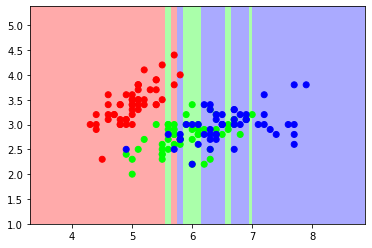

In [12]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = 0.02

    
sepal_length_min, sepal_length_max = X['sepal.length'].min() - 1, X['sepal.length'].max() + 1
sepal_width_min, sepal_width_max = X['sepal.width'].min() - 1, X['sepal.width'].max() + 1



XX,YY = np.meshgrid(np.arange(sepal_length_min, sepal_length_max, h),np.arange(sepal_width_min, sepal_width_max, h))



predictions1 , informations1 = k.predict(np.c_[XX.ravel(), YY.ravel()])

Zeta_y_pred = list()
for i in range(len(predictions1)):
    Zeta_y_pred.append(predictions1[i][2])

Zeta_y_pred_array = np.array(Zeta_y_pred)
Zeta = Zeta_y_pred_array
Zeta = Zeta.reshape(XX.shape)

plt.figure()
plt.pcolormesh(XX, YY,Zeta,cmap=cmap_light)

    
plt.scatter(X['sepal.length'], X['sepal.width'], c=Y.values, cmap=cmap_bold)
plt.xlim(XX.min(), XX.max())
plt.ylim(YY.min(), YY.max())


plt.show()